In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
Geely_auto=pd.read_csv('C:/Users/HP/Desktop/Data Science/Machine Learning/Assignment/CarPrice_Assignment.csv')

In [4]:
##Data Preparation
Geely_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
Geely_auto.shape

(205, 26)

In [6]:
Geely_auto.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
Geely_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
new=Geely_auto['CarName'].str.split(" ",n=1,expand=True)

In [9]:
Geely_auto['company_name']=new[0]

In [10]:
Geely_auto=Geely_auto.drop(['CarName'],axis=1)

In [11]:
###Visualizing the data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#sns.pairplot(Geely_auto)
#plt.show()

In [14]:
Geely_auto.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
Geely_auto['fueltype']=Geely_auto['fueltype'].replace({'gas':1,'diesel':0})
Geely_auto['aspiration']=Geely_auto['aspiration'].replace({'turbo':1,'std':0})
Geely_auto['doornumber']=Geely_auto['doornumber'].replace({'two':2,'four':4})
Geely_auto['enginelocation']=Geely_auto['enginelocation'].replace({'front':1,'rear':0})
Geely_auto['cylindernumber']=Geely_auto['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [16]:
Geely_auto['symboling'] = pd.cut(Geely_auto['symboling'], [-3,-1,1,4], labels=["symbol_pretty_safe","symbol_safe","symbol_risky"],right=False)
Geely_auto.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,symbol_risky,1,0,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,symbol_risky,1,0,2,convertible,rwd,1,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,symbol_risky,1,0,2,hatchback,rwd,1,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,symbol_risky,1,0,4,sedan,fwd,1,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,symbol_risky,1,0,4,sedan,4wd,1,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
sym=pd.get_dummies(Geely_auto['symboling'])
sym=sym.drop(['symbol_pretty_safe'],axis=1)
sym.head(5)

,symbol_safe,symbol_risky
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
Geely_auto=pd.concat([Geely_auto,sym],axis=1)
Geely_auto.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,symbol_safe,symbol_risky
0,1,symbol_risky,1,0,2,convertible,rwd,1,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,1
1,2,symbol_risky,1,0,2,convertible,rwd,1,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,1
2,3,symbol_risky,1,0,2,hatchback,rwd,1,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1
3,4,symbol_risky,1,0,4,sedan,fwd,1,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,audi,0,1
4,5,symbol_risky,1,0,4,sedan,4wd,1,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,audi,0,1


In [19]:
Geely_auto=Geely_auto.drop(['symboling'],axis=1)
Geely_auto.head(5)

,car_ID,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name,symbol_safe,symbol_risky
0,1,1,0,2,convertible,rwd,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,1
1,2,1,0,2,convertible,rwd,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,1
2,3,1,0,2,hatchback,rwd,1,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1
3,4,1,0,4,sedan,fwd,1,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,0,1
4,5,1,0,4,sedan,4wd,1,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,0,1


In [20]:
body=pd.get_dummies(Geely_auto['carbody'])

In [21]:
body=body.drop(['convertible'],axis=1)
#body.head(5)

In [22]:
Geely_auto=pd.concat([Geely_auto,body],axis=1)

In [23]:
Geely_auto=Geely_auto.drop(['carbody'],axis=1)
#Geely_auto.head(5)

In [24]:
drive=pd.get_dummies(Geely_auto['drivewheel'])
drive=drive.drop(['4wd'],axis=1)
#drive.head(5)

In [25]:
Geely_auto=pd.concat([Geely_auto,drive],axis=1)

In [26]:
Geely_auto=Geely_auto.drop(['drivewheel'],axis=1)
#Geely_auto.head(5)

In [27]:
Geely_auto['company_name']=Geely_auto['company_name'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

In [28]:
name=pd.get_dummies(Geely_auto.company_name)
name=name.drop(['alfa-romero'],axis=1)
#name.head(5)

In [29]:
Geely_auto=pd.concat([Geely_auto,name],axis=1)

In [30]:
Geely_auto=Geely_auto.drop(['car_ID','company_name'],axis=1)
#Geely_auto.head(5)

In [31]:
type=pd.get_dummies(Geely_auto['enginetype'])
type=type.drop(['rotor'],axis=1)
#type.head(5)

In [32]:
Geely_auto=pd.concat([Geely_auto,type],axis=1)

In [33]:
Geely_auto=Geely_auto.drop(['enginetype'],axis=1)
#Geely_auto.shape

In [34]:
system=pd.get_dummies(Geely_auto['fuelsystem'])
system=system.drop(['spfi'],axis=1)
#system.head(5)

In [35]:
Geely_auto=pd.concat([Geely_auto,system],axis=1)
Geely_auto.shape

(205, 63)

In [36]:
Geely_auto=Geely_auto.drop(['fuelsystem'],axis=1)
Geely_auto.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,1,0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,1,0
1,1,0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,1,0
2,1,0,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,1,0,0,0,0,0,1,0
3,1,0,4,1,99.8,176.6,66.2,54.3,2337,4,...,1,0,0,0,0,0,0,0,1,0
4,1,0,4,1,99.4,176.6,66.4,54.3,2824,5,...,1,0,0,0,0,0,0,0,1,0


In [37]:
#Splittiing the data into train and test
from sklearn.model_selection import train_test_split


In [38]:
Ga_train,Ga_test=train_test_split(Geely_auto,train_size=0.7,test_size=0.3,random_state=100)

In [39]:
##Scaling-Min-Max scaling
from sklearn.preprocessing import MinMaxScaler


In [40]:
scaler=MinMaxScaler()

In [41]:
Geely_auto.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,1,0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,1,0
1,1,0,2,1,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,1,0
2,1,0,2,1,94.5,171.2,65.5,52.4,2823,6,...,0,0,1,0,0,0,0,0,1,0
3,1,0,4,1,99.8,176.6,66.2,54.3,2337,4,...,1,0,0,0,0,0,0,0,1,0
4,1,0,4,1,99.4,176.6,66.4,54.3,2824,5,...,1,0,0,0,0,0,0,0,1,0


In [42]:
scaling_col=['wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio',
             'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [43]:
Ga_train[scaling_col]=scaler.fit_transform(Ga_train[scaling_col])

In [44]:
Ga_train.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
122,1,0,4,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,...,1,0,0,0,1,0,0,0,0,0
125,1,0,2,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,...,1,0,0,0,0,0,0,0,1,0
166,1,0,2,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,...,0,0,0,0,0,0,0,0,1,0
1,1,0,2,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,...,0,0,0,0,0,0,0,0,1,0
199,1,1,4,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,...,1,0,0,0,0,0,0,0,1,0


In [45]:
##Dividing into X and Y sets for the model building
y_train=Ga_train.pop('price')
x_train=Ga_train

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
rfe=RFE(lm,30)
rfe=rfe.fit(x_train,y_train)

In [49]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 12),
 ('doornumber', False, 30),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 9),
 ('peakrpm', True, 1),
 ('citympg', False, 13),
 ('highwaympg', False, 10),
 ('symbol_safe', False, 14),
 ('symbol_risky', False, 15),
 ('hardtop', False, 6),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 8),
 ('fwd', False, 28),
 ('rwd', False, 29),
 ('Nissan', False, 17),
 ('audi', False, 25),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 11),
 ('dodge', False, 2),
 ('honda', False, 3),
 ('isuzu', False, 18),
 ('jaguar', False, 21),
 ('mazda', False, 23),
 ('mercury', False, 31),
 ('mitsubishi', True, 1),
 ('nissan', False, 19),
 ('peugeot', True, 1),
 ('ply

In [50]:
col = x_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'bmw', 'buick', 'mitsubishi', 'peugeot',
       'plymouth', 'porsche', 'saab', 'subaru', 'volvo', 'dohc', 'ohc', 'ohcv',
       '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [51]:
x_train.columns[~rfe.support_]

Index(['aspiration', 'doornumber', 'wheelbase', 'horsepower', 'citympg',
       'highwaympg', 'symbol_safe', 'symbol_risky', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'Nissan', 'audi', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'nissan', 'renault',
       'toyota', 'volkswagen', 'dohcv', 'l', 'ohcf', 'mfi'],
      dtype='object')

In [52]:
#Building model using statsmodel,for the detailed statistics
x_train_rfe=x_train[col]

In [53]:
x_train_rfe=sm.add_constant(x_train_rfe)

In [54]:
lm1=sm.OLS(y_train,x_train_rfe).fit()  #Running the linear model

In [55]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     91.93
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.59e-65
Time:                        23:02:24   Log-Likelihood:                 242.92
No. Observations:                 143   AIC:                            -427.8
Df Residuals:                     114   BIC:                            -341.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4402      0.082  

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fueltype,inf
24,1bbl,inf
28,mpfi,inf
26,4bbl,inf
25,2bbl,inf
29,spdi,inf
27,idi,178.730000
10,compressionratio,93.980000
7,enginesize,56.730000
6,cylindernumber,22.360000


In [58]:
x_train_new = x_train_rfe.drop(["compressionratio"], axis = 1)

In [59]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train_new)

In [60]:
lm=sm.OLS(y_train,x_train_lm).fit()

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     89.80
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.69e-65
Time:                        23:02:25   Log-Likelihood:                 238.23
No. Observations:                 143   AIC:                            -420.5
Df Residuals:                     115   BIC:                            -337.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2625      0.053      4.

In [62]:
x_train_new1=x_train_new.drop('1bbl',axis=1)

In [63]:
x_train_lm1=sm.add_constant(x_train_new1)

In [64]:
lm1=sm.OLS(y_train,x_train_lm1).fit()

In [65]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     89.80
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.69e-65
Time:                        23:02:25   Log-Likelihood:                 238.23
No. Observations:                 143   AIC:                            -420.5
Df Residuals:                     115   BIC:                            -337.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2588      0.056      4.

In [66]:
x_train_new2=x_train_new1.drop(['4bbl'],axis=1)

In [67]:
x_train_lm2=sm.add_constant(x_train_new2)

In [68]:
lm2=sm.OLS(y_train,x_train_lm2).fit()

In [69]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     94.05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.90e-66
Time:                        23:02:26   Log-Likelihood:                 238.21
No. Observations:                 143   AIC:                            -422.4
Df Residuals:                     116   BIC:                            -342.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2564      0.053      4.

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train_new2.columns
vif['VIF'] = [variance_inflation_factor(x_train_new2.values, i) for i in range(x_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,idi,inf
1,fueltype,inf
8,enginesize,55.480000
7,cylindernumber,21.770000
6,curbweight,18.330000
9,boreratio,12.100000
3,carlength,11.910000
4,carwidth,9.700000
22,ohc,9.660000
26,mpfi,6.530000


In [71]:
x_train_new3=x_train_new2.drop(['fueltype'],axis=1)
x_train_lm3=sm.add_constant(x_train_new3)
lm3=sm.OLS(y_train,x_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     94.05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.90e-66
Time:                        23:02:26   Log-Likelihood:                 238.21
No. Observations:                 143   AIC:                            -422.4
Df Residuals:                     116   BIC:                            -342.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3448      0.082      4.

In [72]:
x_train_new4=x_train_new3.drop(['curbweight'],axis=1)
x_train_lm4=sm.add_constant(x_train_new4)
lm4=sm.OLS(y_train,x_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     86.80
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.97e-64
Time:                        23:02:27   Log-Likelihood:                 229.50
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     117   BIC:                            -330.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3472      0.087      3.

In [73]:
vif = pd.DataFrame()
vif['Features'] = x_train_new4.columns
vif['VIF'] = [variance_inflation_factor(x_train_new4.values, i) for i in range(x_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,375.48
6,enginesize,39.80
5,cylindernumber,19.56
7,boreratio,11.27
2,carlength,10.21
3,carwidth,9.50
20,ohc,8.67
24,mpfi,6.48
22,2bbl,6.08
21,ohcv,5.62


In [74]:
x_train_new5=x_train_new4.drop(['carlength'],axis=1)
x_train_lm5=sm.add_constant(x_train_new5)
lm5=sm.OLS(y_train,x_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     91.15
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.40e-65
Time:                        23:02:27   Log-Likelihood:                 229.48
No. Observations:                 143   AIC:                            -409.0
Df Residuals:                     118   BIC:                            -334.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3446      0.086      4.

In [75]:
vif = pd.DataFrame()
vif['Features'] = x_train_new5.columns
vif['VIF'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,366.82
5,enginesize,39.33
4,cylindernumber,19.43
6,boreratio,10.88
19,ohc,8.66
23,mpfi,6.22
21,2bbl,5.94
20,ohcv,5.61
2,carwidth,5.22
16,subaru,5.19


In [76]:
x_train_new6=x_train_new5.drop(['2bbl'],axis=1)
x_train_lm6=sm.add_constant(x_train_new6)
lm6=sm.OLS(y_train,x_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     93.12
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.44e-65
Time:                        23:02:27   Log-Likelihood:                 227.47
No. Observations:                 143   AIC:                            -406.9
Df Residuals:                     119   BIC:                            -335.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3916      0.083      4.

In [77]:
vif = pd.DataFrame()
vif['Features'] = x_train_new6.columns
vif['VIF'] = [variance_inflation_factor(x_train_new6.values, i) for i in range(x_train_new6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,334.03
5,enginesize,38.96
4,cylindernumber,19.14
6,boreratio,10.68
19,ohc,8.32
20,ohcv,5.59
2,carwidth,5.21
16,subaru,5.19
7,stroke,4.81
18,dohc,4.54


In [78]:
x_train_new7=x_train_new6.drop(['mpfi'],axis=1)
x_train_lm7=sm.add_constant(x_train_new7)
lm7=sm.OLS(y_train,x_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     97.27
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.41e-66
Time:                        23:02:28   Log-Likelihood:                 226.85
No. Observations:                 143   AIC:                            -407.7
Df Residuals:                     120   BIC:                            -339.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3947      0.083      4.

In [79]:
vif = pd.DataFrame()
vif['Features'] = x_train_new7.columns
vif['VIF'] = [variance_inflation_factor(x_train_new7.values, i) for i in range(x_train_new7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,333.58
5,enginesize,38.96
4,cylindernumber,19.13
6,boreratio,10.61
19,ohc,8.19
20,ohcv,5.33
16,subaru,5.17
7,stroke,4.80
2,carwidth,4.75
18,dohc,4.25


In [80]:
x_train_new8=x_train_new7.drop(['ohc'],axis=1)
x_train_lm8=sm.add_constant(x_train_new8)
lm8=sm.OLS(y_train,x_train_lm8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     88.48
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.38e-63
Time:                        23:02:28   Log-Likelihood:                 216.76
No. Observations:                 143   AIC:                            -389.5
Df Residuals:                     121   BIC:                            -324.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3868      0.088      4.

In [81]:
vif = pd.DataFrame()
vif['Features'] = x_train_new8.columns
vif['VIF'] = [variance_inflation_factor(x_train_new8.values, i) for i in range(x_train_new8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,333.41
5,enginesize,38.94
4,cylindernumber,18.77
6,boreratio,10.60
7,stroke,4.76
2,carwidth,4.58
16,subaru,3.17
14,porsche,2.86
19,ohcv,2.63
12,peugeot,2.23


In [82]:
x_train_new9=x_train_new8.drop(['enginesize'],axis=1)
x_train_lm9=sm.add_constant(x_train_new9)
lm9=sm.OLS(y_train,x_train_lm9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     53.28
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.28e-50
Time:                        23:02:29   Log-Likelihood:                 179.66
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     122   BIC:                            -255.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2643      0.113      2.

In [83]:
vif = pd.DataFrame()
vif['Features'] = x_train_new9.columns
vif['VIF'] = [variance_inflation_factor(x_train_new9.values, i) for i in range(x_train_new9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,325.60
2,carwidth,4.31
5,boreratio,3.96
4,cylindernumber,3.68
15,subaru,3.04
6,stroke,2.71
13,porsche,2.56
18,ohcv,2.37
11,peugeot,2.22
10,mitsubishi,2.05


In [84]:
x_train_new10=x_train_new9.drop(['peugeot'],axis=1)
x_train_lm10=sm.add_constant(x_train_new10)
lm10=sm.OLS(y_train,x_train_lm10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     56.48
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.79e-51
Time:                        23:02:29   Log-Likelihood:                 179.59
No. Observations:                 143   AIC:                            -319.2
Df Residuals:                     123   BIC:                            -259.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2624      0.112      2.

In [85]:
x_train_new11=x_train_new10.drop(['ohcv'],axis=1)
x_train_lm11=sm.add_constant(x_train_new11)
lm11=sm.OLS(y_train,x_train_lm11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     59.88
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.78e-52
Time:                        23:02:29   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -320.7
Df Residuals:                     124   BIC:                            -264.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2577      0.111      2.

In [86]:
x_train_new12=x_train_new11.drop(['porsche'],axis=1)
x_train_lm12=sm.add_constant(x_train_new12)
lm12=sm.OLS(y_train,x_train_lm12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     63.79
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.82e-53
Time:                        23:02:29   Log-Likelihood:                 179.22
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     125   BIC:                            -269.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2761      0.104      2.

In [87]:
x_train_new13=x_train_new12.drop(['stroke'],axis=1)
x_train_lm13=sm.add_constant(x_train_new13)
lm13=sm.OLS(y_train,x_train_lm13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     67.96
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.06e-54
Time:                        23:02:30   Log-Likelihood:                 178.89
No. Observations:                 143   AIC:                            -323.8
Df Residuals:                     126   BIC:                            -273.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2963      0.100      2.

In [88]:
x_train_new14=x_train_new13.drop(['saab'],axis=1)
x_train_lm14=sm.add_constant(x_train_new14)
lm14=sm.OLS(y_train,x_train_lm14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     72.58
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.01e-54
Time:                        23:02:30   Log-Likelihood:                 178.46
No. Observations:                 143   AIC:                            -324.9
Df Residuals:                     127   BIC:                            -277.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2843      0.099      2.

In [89]:
x_train_new15=x_train_new14.drop(['plymouth'],axis=1)
x_train_lm15=sm.add_constant(x_train_new15)
lm15=sm.OLS(y_train,x_train_lm15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     77.91
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.57e-55
Time:                        23:02:30   Log-Likelihood:                 178.08
No. Observations:                 143   AIC:                            -326.2
Df Residuals:                     128   BIC:                            -281.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2778      0.099      2.

In [90]:
x_train_new16=x_train_new15.drop(['spdi'],axis=1)
x_train_lm16=sm.add_constant(x_train_new16)
lm16=sm.OLS(y_train,x_train_lm16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.83
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.75e-56
Time:                        23:02:30   Log-Likelihood:                 177.52
No. Observations:                 143   AIC:                            -327.0
Df Residuals:                     129   BIC:                            -285.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2764      0.099      2.

In [91]:
x_train_new17=x_train_new16.drop(['peakrpm'],axis=1)
x_train_lm17=sm.add_constant(x_train_new17)
lm17=sm.OLS(y_train,x_train_lm17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     90.30
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.05e-57
Time:                        23:02:30   Log-Likelihood:                 176.67
No. Observations:                 143   AIC:                            -327.3
Df Residuals:                     130   BIC:                            -288.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3385      0.086      3.

In [92]:
x_train_new18=x_train_new17.drop(['idi'],axis=1)
x_train_lm18=sm.add_constant(x_train_new18)
lm18=sm.OLS(y_train,x_train_lm18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     98.82
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.71e-58
Time:                        23:02:31   Log-Likelihood:                 176.38
No. Observations:                 143   AIC:                            -328.8
Df Residuals:                     131   BIC:                            -293.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3367      0.085      3.

In [93]:
x_train_new19=x_train_new18.drop(['volvo'],axis=1)
x_train_lm19=sm.add_constant(x_train_new19)
lm19=sm.OLS(y_train,x_train_lm19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.24e-58
Time:                        23:02:31   Log-Likelihood:                 174.44
No. Observations:                 143   AIC:                            -326.9
Df Residuals:                     132   BIC:                            -294.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3139      0.085      3.

In [94]:
vif = pd.DataFrame()
vif['Features'] = x_train_new19.columns
vif['VIF'] = [variance_inflation_factor(x_train_new19.values, i) for i in range(x_train_new19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,188.76
2,carwidth,3.23
5,boreratio,2.44
4,cylindernumber,1.86
9,subaru,1.47
7,buick,1.30
3,carheight,1.28
6,bmw,1.16
1,enginelocation,1.14
8,mitsubishi,1.14


In [95]:
#Making prediction 
y_train_price = lm19.predict(x_train_lm19)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

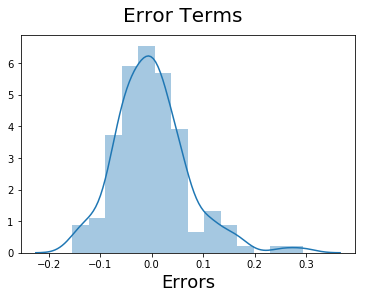

In [97]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 14)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [98]:
# Scaling the test data

In [99]:
scaling_col1=['wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio',
             'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [100]:
Ga_test[scaling_col1]=scaler.transform(Ga_test[scaling_col1])

In [101]:
Ga_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.177419,3.129032,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,...,0.806452,0.048387,0.064516,0.048387,0.258065,0.0,0.112903,0.016129,0.500000,0.048387
std,0.319058,0.385142,0.999736,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,...,0.398304,0.216335,0.247676,0.216335,0.441142,0.0,0.319058,0.127000,0.504082,0.216335
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,4.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000
75%,1.000000,0.000000,4.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,...,1.000000,0.000000,0.000000,0.000000,0.750000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,4.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [102]:
Ga_test.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,ohc,ohcf,ohcv,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
160,1,0,4,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,...,1,0,0,0,1,0,0,0,0,0
186,1,0,4,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,...,1,0,0,0,0,0,0,0,1,0
59,1,0,2,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,...,1,0,0,0,1,0,0,0,0,0
165,1,0,2,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,...,0,0,0,0,0,0,0,0,1,0
140,1,0,2,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,...,0,1,0,0,1,0,0,0,0,0


In [103]:
x_train_new20=x_train_new19.drop(['const'],axis=1)

In [104]:
y_test=Ga_test.pop('price')
x_test=Ga_test

In [105]:
x_test_new=x_test[x_train_new20.columns]

In [106]:
x_test_new = sm.add_constant(x_test_new)

In [107]:
y_pred=lm19.predict(x_test_new)

Text(0,0.5,'y_pred')

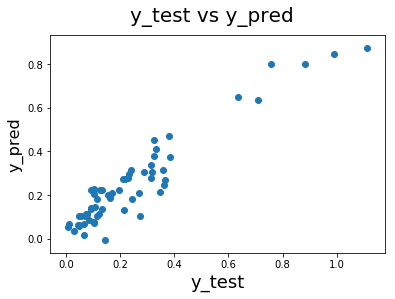

In [108]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [109]:
print(lm19.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.24e-58
Time:                        23:02:35   Log-Likelihood:                 174.44
No. Observations:                 143   AIC:                            -326.9
Df Residuals:                     132   BIC:                            -294.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3139      0.085      3.

**price=0.5992*carwidth-0.5089*enginelocation-0.0976*carheight+0.3850*cylindernumber+0.1533*boreratio+0.3034*bmw
       +0.1822*buick-0.0612*mitsubishi-0.0869*subaru+0.0906dohc**   

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8932784120458149